In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
train_data = pd.read_csv("/content/drive/Shareddrives/NLP Shared Tasks/Meme Classification - Multimodal/Memes/Malayalam/train/train.csv")

In [ ]:
train_data

,image_id,labels,transcriptions
0,391,Not Misogyny,കോളേജിൽ പുതിയ പെൺകുട്ടി വന്നാൽ\nGirls\n© സനൽ\n...
1,848,Not Misogyny,തത്സമയം കൈരളി ചാനലിൽ\n\n- എല്ലാരും എന്തോന്നാ ത...
2,94,Misogyny,ഹണിടെ കുണ്ടിയിൽ തൊട്ടു
3,237,Not Misogyny,കാണാൻ ഭംഗിയില്ല കൈയിൽ പത്തിന്റെ പ്രേമിച്ചു നടക...
4,859,Not Misogyny,ഇന്ത്യ എന്ന വാക്ക് ഒഴിവാക്കാൻ കേന്ദ്രസർക്കാർ ന...
...,...,...,...
635,119,Not Misogyny,ഈ സിനിമ കോടി ക്ലബ്ബിൽ കേറണമെന്നൊന്നും എനിക്ക് ...
636,335,Not Misogyny,ആറ്റുകാൽ പൊങ്കാലക്കിടെ ഗുണ്ടാ ആക്രമണം; ലുട്ടാപ...
637,410,Misogyny,ബസ്സിൽ ഒന്നിച്ചിരുന്ന യാത്ര ചെയ്യുന്ന *ഞാൻ കാമ...
638,226,Not Misogyny,വിമാനം ടേക്ക്ഓഫ് / ലാന്റിങ്ങ് സമയത്ത് ... സാധാ...


In [ ]:
train_data["labels"].unique()

array(['Not Misogyny', 'Misogyny'], dtype=object)

In [ ]:
train_data[train_data.labels == "Not Misogyny"].count()

image_id          384
labels            384
transcriptions    383
dtype: int64

In [ ]:
train_data[train_data.labels == "Misogyny"].count()

image_id          256
labels            256
transcriptions    256
dtype: int64

(array([384.,   0.,   0.,   0., 256.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

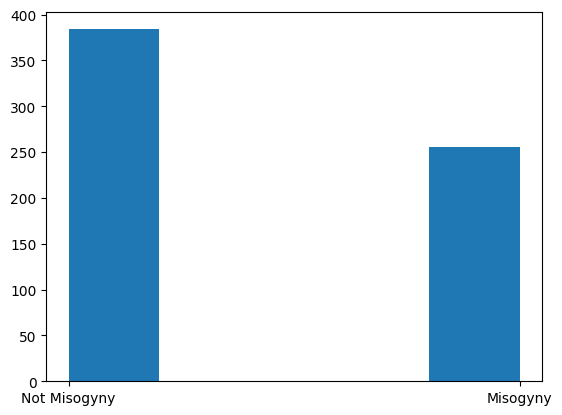

In [ ]:
import matplotlib.pyplot as plt

plt.hist(train_data["labels"], bins=5)

In [ ]:
train_data["labels"].loc[train_data.labels == "not-misogyny"] = "Not Misogyny"
train_data["labels"].loc[train_data.labels == "Not-Misogyny"] = "Not Misogyny"
train_data["labels"].loc[train_data.labels == "misogyny"] = "Misogyny"
train_data["labels"].unique()

<ipython-input-11-d10a19d2245f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["labels"].loc[train_data.labels == "not-misogyny"] = "Not Misogyny"
<ipython-input-11-d10a19d2245f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["labels"].loc[train_data.labels == "Not-Misogyny"] = "Not Misogyny"
<ipython-input-11-d10a19d2245f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["labels"].loc[train_data.la

array(['Not Misogyny', 'Misogyny'], dtype=object)

(array([863.,   0.,   0.,   0., 274.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

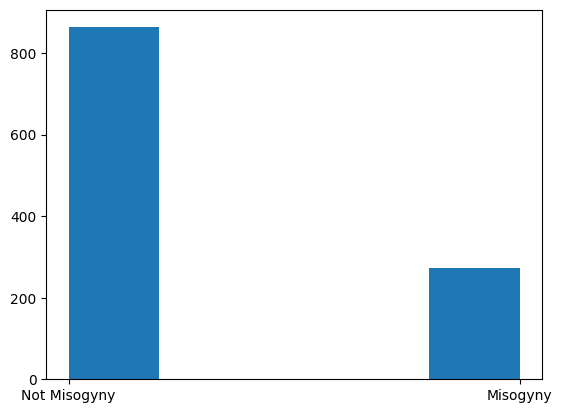

In [ ]:
plt.hist(train_data["labels"], bins=5)

In [ ]:
train_data[train_data.labels == "Misogyny"].count()

image_id          274
labels            274
transcriptions    272
dtype: int64

In [ ]:
# mis = train_data.loc[train_data.labels == "Misogyny"]

In [ ]:
# from sklearn.utils import resample

# minority = train_data.loc[train_data.labels == "Not Misogyny"]
# minority_upsampled = resample(minority,random_state=42,n_samples=len(mis), replace=False)

In [ ]:
# df = pd.concat([mis, minority_upsampled])h

In [ ]:
# df[df.labels == "Not Misogyny"].count()

image_id          384
labels            384
transcriptions    383
dtype: int64

(array([256.,   0.,   0.,   0., 256.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

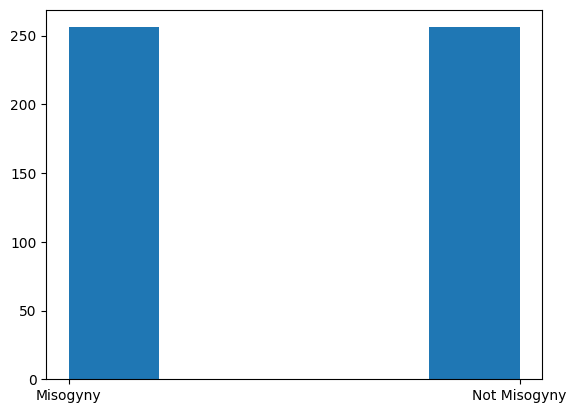

In [ ]:
# plt.hist(df["labels"], bins=5)

In [ ]:
train_data = train_data.dropna(axis=0)

In [ ]:
import re
def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [ ]:
import string
# new_p = [x for x in string.punctuation if x!=","]
# print(new_p)
def removepunctuation(text):
    clean="".join([i for i in text if i not in string.punctuation])
    return clean

In [ ]:
train_data['transcriptions'] = train_data['transcriptions'].apply(lambda x:removepunctuation(x))
train_data['transcriptions'] = train_data['transcriptions'].apply(lambda x:deEmojify(x))

<ipython-input-11-9a6afdad8764>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['transcriptions'] = train_data['transcriptions'].apply(lambda x:removepunctuation(x))
<ipython-input-11-9a6afdad8764>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['transcriptions'] = train_data['transcriptions'].apply(lambda x:deEmojify(x))


In [ ]:
df = train_data

In [ ]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 7.0 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=633c63e34fc007c51bb8bdb8309a404c0ccec430a99e4cab51abdcb41016cec0
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling cha

In [ ]:
from googletrans import Translator

translator = Translator()

In [ ]:
df["transcriptions"] = df["transcriptions"].apply(lambda x: translator.translate(x, src="ml", dest="en").text)
df

<ipython-input-15-a95698b204e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transcriptions"] = df["transcriptions"].apply(lambda x: translator.translate(x, src="ml", dest="en").text)


,image_id,labels,transcriptions
0,391,Not Misogyny,If a new girl comes to college\nGirls\n© Sanal...
1,848,Not Misogyny,Live on Kairali Channel\n\n What is everyone p...
2,94,Misogyny,Honey touched Kundi
3,237,Not Misogyny,"There is no beauty to look at, there is no fre..."
4,859,Not Misogyny,The central government has moved to avoid the ...
...,...,...,...
635,119,Not Misogyny,I don't want this movie to enter the crore clu...
636,335,Not Misogyny,Luttapi Satish killed in gang attack during At...
637,410,Misogyny,I was traveling together on the bus when my bo...
638,226,Not Misogyny,Ordinary passengers le Modiji during the plane...


In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')

# Define a function to remove stop words from a sentence
def remove_stop_words(sentence):
  # Split the sentence into individual words
  words = sentence.split()

  # Use a list comprehension to remove stop words
  filtered_words = [word for word in words if word not in stop_words]

  # Join the filtered words back into a sentence
  return ' '.join(filtered_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df["transcriptions"] = df["transcriptions"].apply(remove_stop_words)
df

<ipython-input-17-0236c5ff5961>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["transcriptions"] = df["transcriptions"].apply(remove_stop_words)


,image_id,labels,transcriptions
0,391,Not Misogyny,If new girl comes college Girls © Sanal What n...
1,848,Not Misogyny,Live Kairali Channel What everyone playing? Va...
2,94,Misogyny,Honey touched Kundi
3,237,Not Misogyny,"There beauty look at, freedom go walk love ten..."
4,859,Not Misogyny,The central government moved avoid word India ...
...,...,...,...
635,119,Not Misogyny,"I want movie enter crore club, belongs club 33..."
636,335,Not Misogyny,Luttapi Satish killed gang attack Attukal Pong...
637,410,Misogyny,I traveling together bus boyfriend started stu...
638,226,Not Misogyny,Ordinary passengers le Modiji plane takeoff la...


In [ ]:
from sklearn.naive_bayes import MultinomialNB

text_model = MultinomialNB()

In [ ]:
df["labels"].loc[df.labels == "Misogyny"] = 1
df["labels"].loc[df.labels == "Not Misogyny"] = 0

<ipython-input-19-98b8f32d15df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["labels"].loc[df.labels == "Misogyny"] = 1
<ipython-input-19-98b8f32d15df>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["labels"].loc[df.labels == "Not Misogyny"] = 0


In [ ]:
df

,image_id,labels,transcriptions
0,391,0,If new girl comes college Girls © Sanal What n...
1,848,0,Live Kairali Channel What everyone playing? Va...
2,94,1,Honey touched Kundi
3,237,0,"There beauty look at, freedom go walk love ten..."
4,859,0,The central government moved avoid word India ...
...,...,...,...
635,119,0,"I want movie enter crore club, belongs club 33..."
636,335,0,Luttapi Satish killed gang attack Attukal Pong...
637,410,1,I traveling together bus boyfriend started stu...
638,226,0,Ordinary passengers le Modiji plane takeoff la...


In [ ]:
df_minority = df.loc[df.labels == 1]
from sklearn.utils import resample

df_minority_upsampled = resample(df_minority, replace=True, n_samples = 600, random_state=42)
df = pd.concat([df, df_minority_upsampled])

(array([863.,   0.,   0.,   0., 872.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

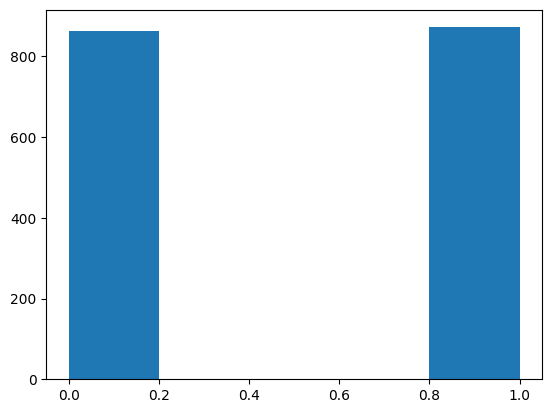

In [ ]:

plt.hist(df["labels"], bins=5)

In [ ]:
df.transcriptions=df.transcriptions.astype(str)

<ipython-input-21-f78acadb185e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.transcriptions=df.transcriptions.astype(str)


In [ ]:
df

,image_id,labels,transcriptions
0,391,0,If new girl comes college Girls © Sanal What n...
1,848,0,Live Kairali Channel What everyone playing? Va...
2,94,1,Honey touched Kundi
3,237,0,"There beauty look at, freedom go walk love ten..."
4,859,0,The central government moved avoid word India ...
...,...,...,...
635,119,0,"I want movie enter crore club, belongs club 33..."
636,335,0,Luttapi Satish killed gang attack Attukal Pong...
637,410,1,I traveling together bus boyfriend started stu...
638,226,0,Ordinary passengers le Modiji plane takeoff la...


In [ ]:
X_train_text = df["transcriptions"]
y_train = df["labels"]

In [ ]:
dev_data = pd.read_csv("/content/drive/Shareddrives/NLP Shared Tasks/Meme Classification - Multimodal/Memes/Malayalam/dev/dev.csv")

In [ ]:
dev_data = dev_data.dropna(axis=0)

In [ ]:
dev_data

,image_id,labels,transcriptions
0,727,Misogyny,(June 19) ഒരു ശരാശരി കാജൽ ഭക്തന്റെ അന്നത്തെ ദി...
1,139,Not Misogyny,സ്വർണകോടാലികിട്ടാൻപുഴയിലേക്ക് ഇരുമ്പുകേടാലി എറ...
2,267,Not Misogyny,പെരുന്നാളിന് ചങ്കിന്റെ കൂടെ ബീഫ് വാങ്ങാൻ പോയ സ...
3,766,Not Misogyny,\nഎനിക്ക് പാർട്ടിയെ വിശ്വാസം ഉണ്ട്. കരിവന്നൂരി...
4,799,Not Misogyny,കോട്ടയത്ത് ഇനി ഈ ബാങ്ക്\nപ്രവർത്തിക്കണോയെന്ന് ...
...,...,...,...
155,348,Not Misogyny,\nഎടാ ഉണ്ണി. ആശാൻ നിന്നെ ചുരുളി 2വിലേക്ക് എടുത...
156,436,Misogyny,ആഹാരത്തിന് ശേഷം നിർബന്ധമായും വെളളം കുടിക്കേണ്ട...
157,485,Misogyny,ഇനി ഏത് ചലഞ്ച് ഇടണം എന്നാലോചിക്കുന്ന ചലഞ്ച് അഡ...
158,464,Misogyny,മലയാളത്തിലെ ആദ്യത്തെ adult only പ്ലാറ്റഫോമായ F...


In [ ]:
dev_data['transcriptions'] = dev_data['transcriptions'].apply(lambda x:removepunctuation(x))
dev_data['transcriptions'] = dev_data['transcriptions'].apply(lambda x:deEmojify(x))

dev_data["transcriptions"] = dev_data["transcriptions"].apply(lambda x: translator.translate(x, src="ml", dest="en").text)
dev_data["transcriptions"] = dev_data["transcriptions"].apply(remove_stop_words)
dev_data

,image_id,labels,transcriptions
0,727,Misogyny,June 19 An average Kajal devotee's day morning...
1,139,Not Misogyny,Better luck next time iron ax thrown golden ax
2,267,Not Misogyny,Sanki went buy beef Chunk festival Kazakh Who ...
3,766,Not Misogyny,I faith party party assured loss money Karivan...
4,799,Not Misogyny,This bank Kottayam DYFI whether work Jake C. T...
...,...,...,...
155,348,Not Misogyny,Eda Unni Aashan rolled took 2 LJP
156,436,Misogyny,"It mandatory drink water meals, otherwise food..."
157,485,Misogyny,Challenge Addict Chanchal sitting kitchen wond...
158,464,Misogyny,"FUPE yessma series THA, first adult platform M..."


In [ ]:
dev_data["labels"].unique()

array(['Misogyny', 'Not Misogyny'], dtype=object)

In [ ]:
dev_data["labels"].loc[dev_data.labels == "not-misogyny"] = "Not Misogyny"
dev_data["labels"].loc[dev_data.labels == "Not-Misogyny"] = "Not Misogyny"
dev_data["labels"].loc[dev_data.labels == "misogyny"] = "Misogyny"
dev_data["labels"].unique()

<ipython-input-72-07630d3d1ff7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_data["labels"].loc[dev_data.labels == "not-misogyny"] = "Not Misogyny"
<ipython-input-72-07630d3d1ff7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_data["labels"].loc[dev_data.labels == "Not-Misogyny"] = "Not Misogyny"
<ipython-input-72-07630d3d1ff7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_data["labels"].loc[dev_data.labels == "mis

array(['Misogyny', 'Not Misogyny'], dtype=object)

In [ ]:
dev_data["labels"].loc[dev_data.labels == "Misogyny"] = 1
dev_data["labels"].loc[dev_data.labels == "Not Misogyny"] = 0

<ipython-input-29-63510c6459c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_data["labels"].loc[dev_data.labels == "Misogyny"] = 1
<ipython-input-29-63510c6459c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dev_data["labels"].loc[dev_data.labels == "Not Misogyny"] = 0


In [ ]:
dev_data

,image_id,labels,transcriptions
0,727,1,June 19 An average Kajal devotee's day morning...
1,139,0,Better luck next time iron ax thrown golden ax
2,267,0,Sanki went buy beef Chunk festival Kazakh Who ...
3,766,0,I faith party party assured loss money Karivan...
4,799,0,This bank Kottayam DYFI whether work Jake C. T...
...,...,...,...
155,348,0,Eda Unni Aashan rolled took 2 LJP
156,436,1,"It mandatory drink water meals, otherwise food..."
157,485,1,Challenge Addict Chanchal sitting kitchen wond...
158,464,1,"FUPE yessma series THA, first adult platform M..."


In [ ]:
X_dev_text = dev_data["transcriptions"]
y_dev = dev_data["labels"]

In [ ]:
X_dev_text = vectorizer.transform(X_dev_text)

In [ ]:
y_dev = dev_data["labels"]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_text = vectorizer.fit_transform(X_train_text)
X_dev_text = vectorizer.transform(X_dev_text)

In [ ]:
y_train = y_train.infer_objects()
y_dev = y_dev.infer_objects()

In [ ]:
text_model.fit(X_train_text, y_train)

MultinomialNB()

In [ ]:
y_pred_text = text_model.predict(X_dev_text)
y_pred_proba_text = text_model.predict_proba(X_dev_text)

In [ ]:
y_pred_proba_text

array([[0.55090949, 0.44909051],
       [0.51771179, 0.48228821],
       [0.82174053, 0.17825947],
       [0.64134474, 0.35865526],
       [0.83593983, 0.16406017],
       [0.67800116, 0.32199884],
       [0.69831578, 0.30168422],
       [0.76181598, 0.23818402],
       [0.66476928, 0.33523072],
       [0.2719503 , 0.7280497 ],
       [0.71601658, 0.28398342],
       [0.76677015, 0.23322985],
       [0.53570771, 0.46429229],
       [0.70913096, 0.29086904],
       [0.48198058, 0.51801942],
       [0.70228682, 0.29771318],
       [0.25146727, 0.74853273],
       [0.41043837, 0.58956163],
       [0.69079455, 0.30920545],
       [0.7341279 , 0.2658721 ],
       [0.5623472 , 0.4376528 ],
       [0.55196388, 0.44803612],
       [0.36116088, 0.63883912],
       [0.60727496, 0.39272504],
       [0.50490925, 0.49509075],
       [0.91457494, 0.08542506],
       [0.37337656, 0.62662344],
       [0.51374262, 0.48625738],
       [0.67196654, 0.32803346],
       [0.86678675, 0.13321325],
       [0.

In [ ]:
y_pred_proba_text_fin = []
for i in y_pred_proba_text:
  y_pred_proba_text_fin.append(i[1])
y_pred_proba_text_fin

[0.4490905091764933,
 0.4822882083614936,
 0.17825947456791252,
 0.35865525925069014,
 0.16406016994729236,
 0.3219988395159481,
 0.3016842249038443,
 0.23818402024029406,
 0.3352307237578938,
 0.7280496999689274,
 0.28398342264104676,
 0.233229854924875,
 0.4642922878865134,
 0.2908690443320148,
 0.5180194241875077,
 0.29771317898442934,
 0.748532732498635,
 0.589561625245797,
 0.3092054486499626,
 0.265872101304381,
 0.43765279569293025,
 0.4480361200666908,
 0.6388391162881628,
 0.39272503765017847,
 0.4950907548481944,
 0.08542505925532852,
 0.6266234372751431,
 0.48625738156470755,
 0.32803346487686963,
 0.13321324592077835,
 0.3831464703603836,
 0.33809005429577377,
 0.3036294491257462,
 0.10319611015439153,
 0.31964916474573146,
 0.4143100733316876,
 0.4015784061251297,
 0.5393590011239905,
 0.4033509440007457,
 0.23486624607760315,
 0.3603216601399567,
 0.44598612541577826,
 0.5385611293399079,
 0.47291032104713543,
 0.27585962013644627,
 0.2543639062419032,
 0.4194975958105597

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_dev, y_pred_text)
classification_rep = classification_report(y_dev, y_pred_text)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7125
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.93      0.79        96
           1       0.78      0.39      0.52        64

    accuracy                           0.71       160
   macro avg       0.74      0.66      0.66       160
weighted avg       0.73      0.71      0.69       160



In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X_train_text, y_train)

lr_y_pred_dev = lr_model.predict(X_dev_text)
# lr_y_pred_train = lr_model.predict(X_train)

# accuracy = accuracy_score(y_train, lr_y_pred_train)
# classification_rep = classification_report(y_train, lr_y_pred_train)
# print("Accuracy:", accuracy)
# print("Classification Report:\n", classification_rep)
# print()
# print()
accuracy = accuracy_score(y_dev, lr_y_pred_dev)
classification_rep = classification_report(y_dev, lr_y_pred_dev)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.94      0.79        96
           1       0.79      0.34      0.48        64

    accuracy                           0.70       160
   macro avg       0.73      0.64      0.63       160
weighted avg       0.72      0.70      0.66       160



In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_text.toarray(), y_train)

nb_y_pred_dev = nb_model.predict(X_dev_text.toarray())
# nb_y_pred_train = nb_model.predict(X_train_text)

from sklearn.metrics import accuracy_score, classification_report
# accuracy = accuracy_score(y_train, nb_y_pred_train)
# classification_rep = classification_report(y_train, nb_y_pred_train)
# print("Accuracy:", accuracy)
# print("Classification Report:\n", classification_rep)
# print()
# print()
accuracy = accuracy_score(y_dev, nb_y_pred_dev)
classification_rep = classification_report(y_dev, nb_y_pred_dev)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.70625
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.80      0.77        96
           1       0.65      0.56      0.61        64

    accuracy                           0.71       160
   macro avg       0.69      0.68      0.69       160
weighted avg       0.70      0.71      0.70       160



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

In [ ]:
!pip install tensorflow==2.14.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 86.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.15.0
    Uninstalling tensorflow-estimator-2.15.0:
      Successfully uninstalled tensorflow-estimator-2.15.0
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.2.0
    Uninstalling google-auth-oauthlib-1.2.0:
      Successfully uninstalled google-auth-oauthlib-1.2.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.1
    Uninstalling te

In [ ]:
img_model = tf.keras.models.load_model('/content/drive/Shareddrives/NLP Shared Tasks/Meme Classification - Multimodal/Memes/Malayalam/Image Classification/model.keras')

In [ ]:
img_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 dense_5 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 24637826 (93.99 MB)
Trainable params: 1050114 (4.01 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
import cv2
j=0
def read_img(image_id):
  global j
  j+=1
  print(j)
  image = cv2.imread("/content/drive/Shareddrives/NLP Shared Tasks/Meme Classification - Multimodal/Memes/Malayalam/test_with_labels/"+str(image_id)+".jpg")
  im = cv2.resize(image, (200,200))
  image = np.expand_dims(im, axis=0)

  pred = img_model.predict(image)[0]
  return pred[0]

In [ ]:
y_pred_proba_img = dev_data["image_id"].apply(read_img)
y_pred_proba_img

1
1/1 [==============================] - 1s 942ms/step
2
1/1 [==============================] - 0s 120ms/step
3
1/1 [==============================] - 0s 121ms/step
4
1/1 [==============================] - 0s 122ms/step
5
1/1 [==============================] - 0s 103ms/step
6
1/1 [==============================] - 0s 102ms/step
7
1/1 [==============================] - 0s 165ms/step
8
1/1 [==============================] - 0s 179ms/step
9
1/1 [==============================] - 0s 105ms/step
10
1/1 [==============================] - 0s 116ms/step
11
1/1 [==============================] - 0s 104ms/step
12
1/1 [==============================] - 0s 104ms/step
13
1/1 [==============================] - 0s 114ms/step
14
1/1 [==============================] - 0s 115ms/step
15
1/1 [==============================] - 0s 104ms/step
16
1/1 [==============================] - 0s 105ms/step
17
1/1 [==============================] - 0s 104ms/step
18
1/1 [==============================] - 0s 104ms/step
1

0      0.565785
1      0.027674
2      0.046274
3      0.999767
4      0.635745
         ...   
195    0.165383
196    0.038417
197    0.039129
198    0.996794
199    0.468631
Name: image_id, Length: 200, dtype: float32

In [ ]:
y_pred_img = []
for i in y_pred_proba_img:
  if i>=0.5:
    y_pred_img.append(1)
  else:
    y_pred_img.append(0)

In [ ]:
accuracy = accuracy_score(y_dev, y_pred_img)
classification_rep = classification_report(y_dev, y_pred_img)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.82
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       120
           1       0.78      0.76      0.77        80

    accuracy                           0.82       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.82      0.82      0.82       200



In [ ]:
y_pred_proba = []
k = 1
for i,j in zip(y_pred_proba_text_fin, y_pred_proba_img):
  print(i, j)
  print(k)
  y_pred_proba.append(i*0.7 + j*0.3)
  k+=1

0.2762770688685817 0.5657853484153748
1
0.2442070811105355 0.027674049139022827
2
0.1955301982833675 0.046273864805698395
3
0.6178070405121348 0.9997667670249939
4
0.668209142866187 0.6357450485229492
5
0.46645664441010465 0.9996224641799927
6
0.5783042195600081 0.8119295835494995
7
0.40573576461902583 0.26310402154922485
8
0.12625984876677318 0.09364983439445496
9
0.4000900082865759 0.5717216730117798
10
0.3387531350041812 0.11789621412754059
11
0.4960894036371356 0.828292965888977
12
0.5746581818066533 0.9998356103897095
13
0.40062597809076683 0.4188653826713562
14
0.45831322881644104 0.05542127788066864
15
0.4379453930559309 0.040369004011154175
16
0.45061887847681853 0.311673641204834
17
0.32355858201735715 0.34418487548828125
18
0.27638185064125953 0.009516901336610317
19
0.28670481421113825 0.140729159116745
20
0.6967926855770836 0.808512806892395
21
0.37226634629680916 0.08159811049699783
22
0.4411539288774346 0.15791557729244232
23
0.3382499592280215 0.04850994050502777
24
0.23

In [ ]:
for i in y_pred:
  if i not in (0,1):
    print(i)

In [ ]:
y_pred = []
for i in y_pred_proba:
  if i>=0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_pred

[0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0]

In [ ]:
accuracy = accuracy_score(y_dev, y_pred)
classification_rep = classification_report(y_dev, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       120
           1       0.94      0.75      0.83        80

    accuracy                           0.88       200
   macro avg       0.90      0.86      0.87       200
weighted avg       0.89      0.88      0.88       200



In [ ]:
y_dev = y_dev.infer_objects()

In [ ]:
y_pred

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_dev, y_pred)
cm

array([[116,   4],
       [ 20,  60]])

In [ ]:
!pip install plotly

<Axes: >

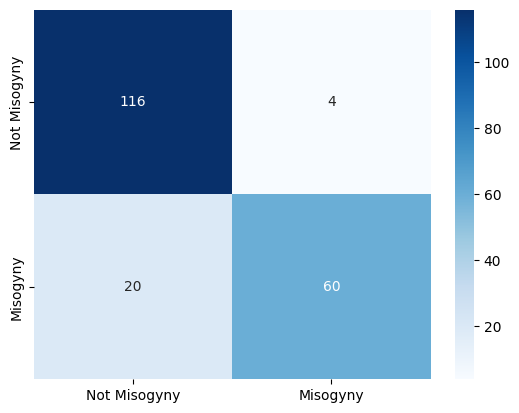

In [ ]:
import seaborn as sns
df_cm = pd.DataFrame(cm, ["Not Misogyny", "Misogyny"], ["Not Misogyny","Misogyny"])
sns.heatmap(df_cm, annot=True, fmt="", cmap='Blues')